<h2>Multiple linear regression</h2>

Based on the Dataset: https://www.kaggle.com/datasets/talhabarkaatahmad/pakistan-used-car-prices-2023/data

In [365]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [366]:
# Set the display format for floating-point numbers in the DataFrame to two decimal places
pd.options.display.float_format = '{:.2f}'.format

In [367]:
# Read the CSV file into a Pandas DataFrame
cars_df = pd.read_csv("data/pakwheels_used_car_data_v02.csv")

# Display the first few rows of the DataFrame
cars_df.head()

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
0,7943732,Peshawar,NaN,Sedan,Toyota,Corolla,2013.00,1300.00,Manual,Petrol,Silver Metallic,Lahore,145000,2870000.00
1,7730314,Lahore,NaN,Sedan,Honda,City,2000.00,1300.00,Manual,Petrol,Blue,Lahore,230000,995000.00
2,7943737,Lahore,NaN,Sedan,Toyota,Yaris,2021.00,1300.00,Manual,Petrol,Super White,Punjab,60500,3585000.00
3,7943733,Lahore,NaN,Hatchback,Suzuki,Swift,2017.00,1300.00,Manual,Petrol,Grey,Islamabad,87000,2250000.00
4,7923484,Lahore,NaN,Sedan,Honda,Civic,2017.00,1800.00,Automatic,Petrol,Grey,Lahore,86000,4850000.00


In [368]:
# Dropo the column "a unique ad referance" 
cars_df = cars_df.drop('addref', axis=1)

# Create a new column with converted prices in Euros
cars_df['price_EUR'] = cars_df['price'].apply(lambda x: x * 0.0034)

In [369]:
# Display summary information about the DataFrame
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77878 entries, 0 to 77877
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          77878 non-null  object 
 1   assembly      24189 non-null  object 
 2   body          68974 non-null  object 
 3   make          77878 non-null  object 
 4   model         77878 non-null  object 
 5   year          73099 non-null  float64
 6   engine        77875 non-null  float64
 7   transmission  77878 non-null  object 
 8   fuel          76972 non-null  object 
 9   color         76398 non-null  object 
 10  registered    77878 non-null  object 
 11  mileage       77878 non-null  int64  
 12  price         77295 non-null  float64
 13  price_EUR     77295 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 8.3+ MB


In [370]:
# Calculate the sum of missing values (NaN) for each column in the DataFrame
cars_df.isna().sum()

city                0
assembly        53689
body             8904
make                0
model               0
year             4779
engine              3
transmission        0
fuel              906
color            1480
registered          0
mileage             0
price             583
price_EUR         583
dtype: int64

In [371]:
# Simply drop the ones which are NaN
cars_df.dropna(subset=['engine', 'year', 'fuel', 'price', 'body'], inplace=True)

In [372]:
# There are only two options either it is Imported or Local
cars_df['assembly'].fillna('Local', inplace=True)

cars_df['color'].fillna('unkonwn', inplace=True)

In [373]:
# Adjust the data types
cars_df['year'] = cars_df['year'].astype(int)
cars_df['engine'] = cars_df['engine'].astype(int)

In [374]:
cars_df.describe()

,year,engine,mileage,price,price_EUR
count,64561.00,64561.00,64561.00,64561.00,64561.00
mean,2013.30,1396.40,91505.67,3865602.79,13143.05
std,7.16,637.52,83431.05,5462201.06,18571.48
min,1990.00,100.00,1.00,110000.00,374.00
25%,2008.00,1000.00,39000.00,1550000.00,5270.00
50%,2015.00,1300.00,80000.00,2790000.00,9486.00
75%,2019.00,1600.00,123000.00,4500000.00,15300.00
max,2022.00,7744.00,1000000.00,529000000.00,1798600.00


In [375]:
# Calculate the percentage of each body type
body_counts = cars_df['body'].value_counts()
total_count = len(cars_df)
body_percentages = (body_counts / total_count) * 100

body_percentages_df = pd.DataFrame({'body': body_percentages.index, 'percentage': body_percentages.values})

# Getting the top 3 and the sum up the rest 
top_3 = body_percentages_df.head(3)
others_percentage = body_percentages_df['percentage'][3:].sum()
final_data = pd.concat([top_3, pd.DataFrame({'body': ['Others'], 'percentage': [others_percentage]})])


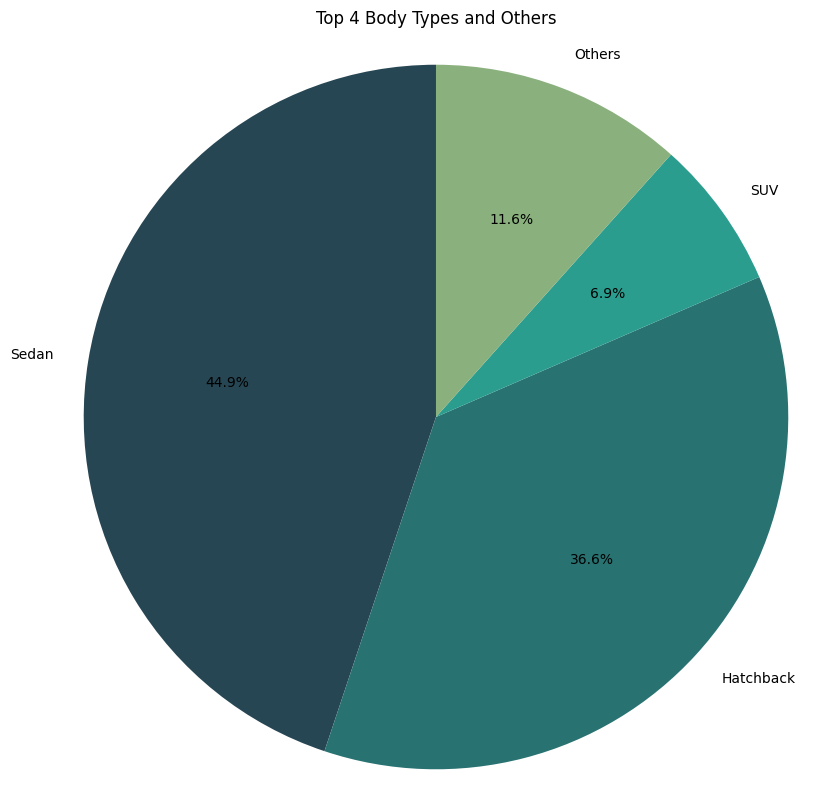

In [376]:
# Visualize as a pie chart
plt.figure(figsize=(10, 10))
plt.pie(final_data['percentage'], labels=final_data['body'], autopct='%1.1f%%', colors=['#264653', '#287271', '#2A9D8F', '#8AB17D'], startangle=90)
plt.title('Top 4 Body Types and Others')
plt.axis('equal')
plt.show()

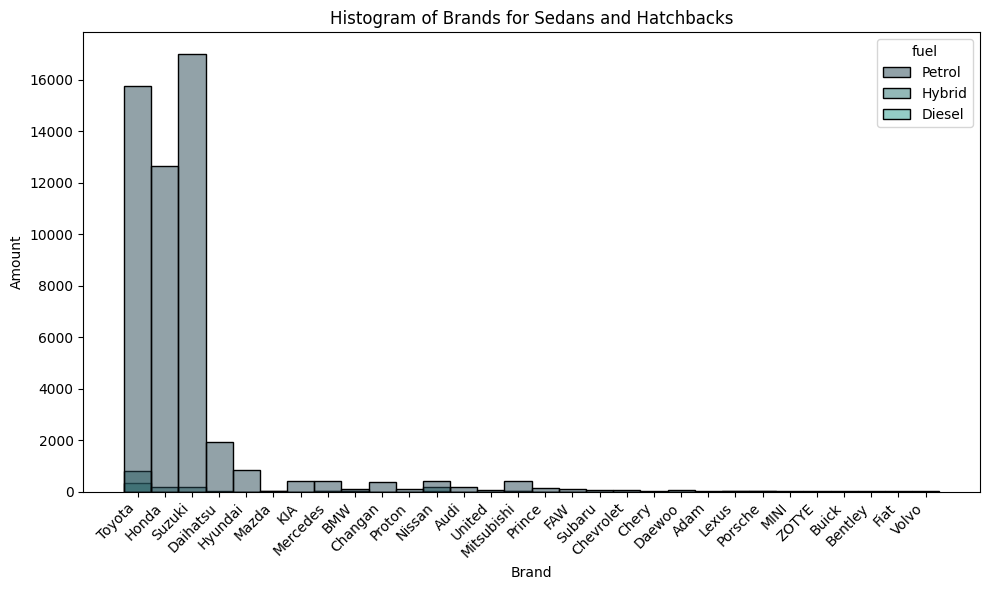

In [377]:
# Filter the data to include only sedans and hatchbacks
sedan_hatchback_data = cars_df[cars_df['body'].isin(['Sedan', 'Hatchback'])]

# Create a figure with a histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(data=sedan_hatchback_data, x='make', bins=10, hue='fuel')  
plt.xticks(rotation=45, ha='right')  
plt.xlabel('Brand')
plt.ylabel('Amount')
plt.title('Histogram of Brands for Sedans and Hatchbacks')
plt.tight_layout()
plt.show()

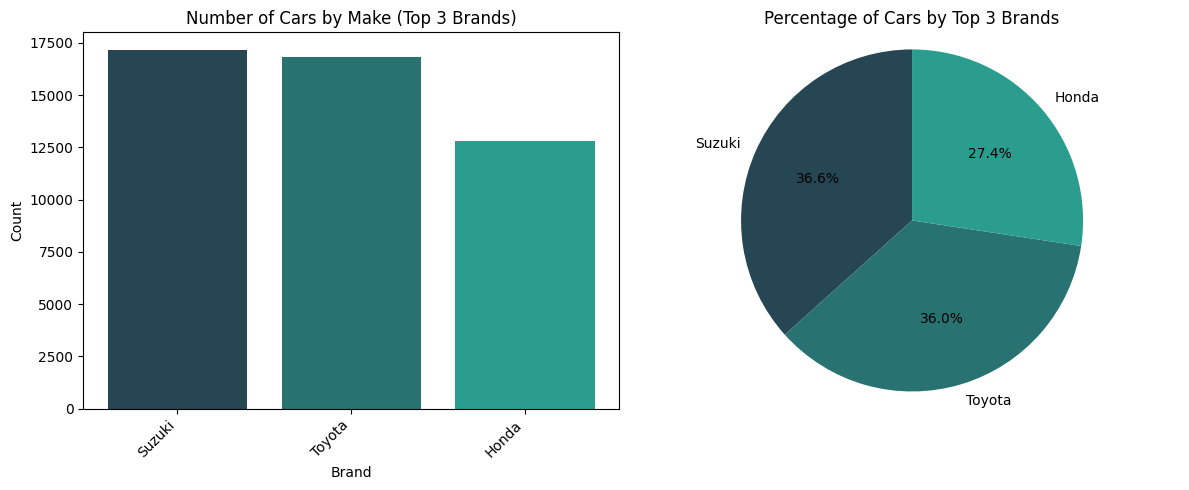

In [378]:
# Calculate the counts of cars for each brand and select the top 3 brands
make_counts_all = sedan_hatchback_data['make'].value_counts().head(3)

# Create a pie chart
plt.figure(figsize=(12, 5))

# Subplot 1: Bar chart
plt.subplot(1, 2, 1)
plt.bar(make_counts_all.index, make_counts_all, color=['#264653', '#287271', '#2A9D8F'])
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Number of Cars by Make (Top 3 Brands)')
plt.xticks(rotation=45, ha='right')

# Subplot 2: Pie chart
plt.subplot(1, 2, 2)
plt.pie(make_counts_all, labels=make_counts_all.index, autopct='%1.1f%%', startangle=90, colors=['#264653', '#287271', '#2A9D8F'])
plt.title('Percentage of Cars by Top 3 Brands')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

plt.tight_layout()
plt.show()


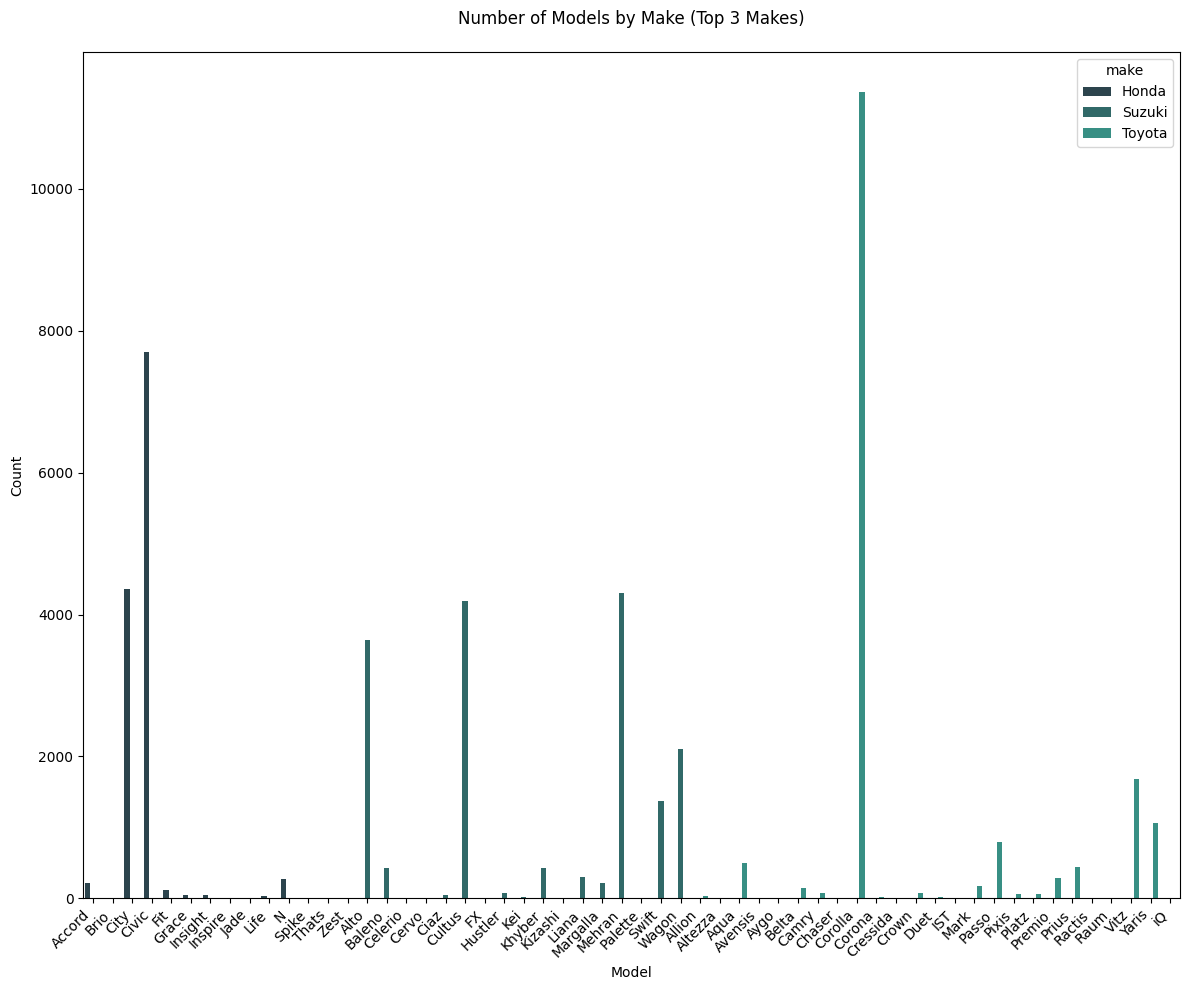

In [379]:
# Count the number of models for each make
make_counts = sedan_hatchback_data['make'].value_counts().head(3).index
sedan_hatchback_data_top3 = sedan_hatchback_data[sedan_hatchback_data['make'].isin(make_counts)]
make_model_counts = sedan_hatchback_data_top3.groupby(['make', 'model']).size().reset_index(name='count')

colors = ['#264653', '#287271', '#2A9D8F']
sns.set_palette(sns.color_palette(colors))

# Create a bar chart
plt.figure(figsize=(12, 10))
sns.barplot(data=make_model_counts, x='model', y='count', hue='make')
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Number of Models by Make (Top 3 Makes)', loc='center', pad=20)  # Set title on top
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()



In [380]:
sedan_hatchback_data_top3.head()

,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price,price_EUR
0,Peshawar,Local,Sedan,Toyota,Corolla,2013,1300,Manual,Petrol,Silver Metallic,Lahore,145000,2870000.00,9758.00
1,Lahore,Local,Sedan,Honda,City,2000,1300,Manual,Petrol,Blue,Lahore,230000,995000.00,3383.00
2,Lahore,Local,Sedan,Toyota,Yaris,2021,1300,Manual,Petrol,Super White,Punjab,60500,3585000.00,12189.00
3,Lahore,Local,Hatchback,Suzuki,Swift,2017,1300,Manual,Petrol,Grey,Islamabad,87000,2250000.00,7650.00
4,Lahore,Local,Sedan,Honda,Civic,2017,1800,Automatic,Petrol,Grey,Lahore,86000,4850000.00,16490.00


In [381]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
sedan_hatchback_data_top3 = sedan_hatchback_data_top3.copy()

# Create a new column 'gear_automatik' based on the 'transmission' column using .loc
sedan_hatchback_data_top3.loc[:, 'gearbox'] = (sedan_hatchback_data_top3['transmission'] == 'Automatik').astype(bool)
sedan_hatchback_data_top3.loc[:, 'production'] = (sedan_hatchback_data_top3['assembly'] == 'Local').astype(bool)

In [382]:
print(sedan_hatchback_data_top3.head())

       city assembly       body    make    model  year  engine transmission  \
0  Peshawar    Local      Sedan  Toyota  Corolla  2013    1300       Manual   
1    Lahore    Local      Sedan   Honda     City  2000    1300       Manual   
2    Lahore    Local      Sedan  Toyota    Yaris  2021    1300       Manual   
3    Lahore    Local  Hatchback  Suzuki    Swift  2017    1300       Manual   
4    Lahore    Local      Sedan   Honda    Civic  2017    1800    Automatic   

     fuel            color registered  mileage      price  price_EUR  gearbox  \
0  Petrol  Silver Metallic     Lahore   145000 2870000.00    9758.00    False   
1  Petrol             Blue     Lahore   230000  995000.00    3383.00    False   
2  Petrol      Super White     Punjab    60500 3585000.00   12189.00    False   
3  Petrol             Grey  Islamabad    87000 2250000.00    7650.00    False   
4  Petrol             Grey     Lahore    86000 4850000.00   16490.00    False   

   production  
0        True  
1     

In [383]:
X = sedan_hatchback_data_top3[['year', 'engine', 'mileage', 'gearbox', 'production', 'make']]
y = sedan_hatchback_data_top3['price_EUR']
cf = ColumnTransformer([
    ("Brand", OneHotEncoder(), ['make'])
], remainder = 'passthrough')

cf.fit(X)
X_transformed = cf.transform(X)

# Split the new dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, train_size=0.75)

# Creating a Linear Regression model instance
model = LinearRegression()

# Fit the model using the training data
model.fit(X_train, y_train)

# Print the score (R-squared) of the model
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7650463195665892
0.10331792340603585


In [384]:
# Define the new data for prediction
X_pred = pd.DataFrame([
    [2023, 2000, 48000, 1, 0, 'Toyota'],
    [2004, 1300, 104532, 0, 1, 'Suzuki'],
    [1998, 1500, 332412, 1, 1, 'Honda']
], columns = ['year', 'engine', 'mileage', 'gearbox', 'production', 'make'])

# Make predictions using the trained model and round the results to two decimal places
print(model.predict(cf.transform(X_pred)).round(2))

[23659.42  2949.16  1529.94]
